In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams.update({'font.size': 14})

In [4]:
d = 5
def lorentzian(x, x0):
    return 1/((x-x0)**2 + d**2)

def f(x): # 50 points is nice
    return lorentzian(x, 115) + lorentzian(x, 450)

domain = [-100,700]

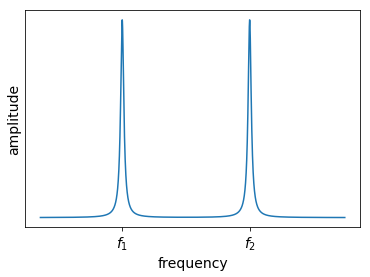

In [5]:
plt.cla()
x = np.linspace(*domain, 5000)
y = f(x) #+ np.random.randn(5000)*0.001
plt.plot(x,y)

# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.xticks([115,450], ['$f_1$', '$f_2$'])

plt.savefig(f'original.svg', bbox_inches='tight')

In [ ]:
for N in [25,50,75,100]:
    plt.cla()
    x = np.linspace(*domain, 5000)
    y = f(x)
    plt.plot(x,y, linestyle=':')

    x = np.linspace(*domain, N)
    y = f(x)
    plt.plot(x,y, marker='o', markersize=4, linewidth=0)

    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.xticks([115,450], ['$f_1$', '$f_2$'])
    plt.savefig(f'homo_{N}.svg', bbox_inches='tight')

In [ ]:
import adaptive
adaptive.notebook_extension()

In [ ]:
for N in [25,50,75,100]:
    plt.cla()
    x = np.linspace(*domain, 5000)
    y = f(x)
    plt.plot(x,y, linestyle=':')


    learner = adaptive.Learner1D(f, domain)
    adaptive.runner.simple(learner, goal=lambda l: l.npoints >= N)
    x,y = zip(*sorted(learner.data.items()))
    plt.plot(x,y, marker='o', markersize=4, linewidth=0)

    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.xticks([115,450], ['$f_1$', '$f_2$'])
    plt.savefig(f'adaptive_{N}.svg', bbox_inches='tight')

In [ ]:
from adaptive.learner.learner1D import curvature_loss_function

In [ ]:
for N in [25,50,75,100]:
    plt.cla()
    x = np.linspace(*domain, 5000)
    y = f(x)
    plt.plot(x,y, linestyle=':')

    learner = adaptive.Learner1D(f, domain, loss_per_interval=curvature_loss_function(1,0,0.05))
    adaptive.runner.simple(learner, goal=lambda l: l.npoints >= N)
    x,y = zip(*sorted(learner.data.items()))
    plt.plot(x,y, marker='o', markersize=4, linewidth=0)

    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.xticks([115,450], ['$f_1$', '$f_2$'])
    plt.savefig(f'curv_{N}.svg', bbox_inches='tight')